In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm

import mplhep as hep
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2

## Column values

In [75]:
filename = 'output/01_stat_10k_experiments_100_bins/output_10k_01_stat_1E4_data_100bin.txt'
filename_cut = filename.replace('output/', '')
filename_cut = filename_cut.replace('.txt', '')
filename_cut = filename_cut.replace('/', '_')

In [76]:
data = pd.read_csv(filename, sep=';')
data

,BKG PROBABILITY,BKG ERROR,SIGNAL PROBABILITY,SIGNAL ERROR,CORR,MAN_CORR
0,0.700556,0.016885,0.299417,0.015314,-0.802255,-0.802255
1,0.675629,0.016180,0.324354,0.015008,-0.784060,-0.784060
2,0.684992,0.016283,0.314986,0.015055,-0.786246,-0.786246
3,0.717392,0.017050,0.282577,0.015263,-0.803753,-0.803753
4,0.686775,0.016708,0.313203,0.015278,-0.799590,-0.799590
...,...,...,...,...,...,...
9995,0.699789,0.014623,0.300212,0.013353,-0.689061,-0.689061
9996,0.692095,0.016702,0.307881,0.015232,-0.798903,-0.798903
9997,0.719528,0.017361,0.280440,0.015374,-0.808906,-0.808906
9998,0.679998,0.017070,0.319983,0.015572,-0.807424,-0.807424


## Information about every column

In [77]:
data.describe()

,BKG PROBABILITY,BKG ERROR,SIGNAL PROBABILITY,SIGNAL ERROR,CORR,MAN_CORR
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9994.000000
mean,0.700188,0.016230,0.299796,0.014774,-0.764321,-0.764779
std,0.015165,0.004555,0.015164,0.005406,0.057111,0.053969
min,0.635015,0.013895,0.243368,0.012735,-0.843872,-0.843872
25%,0.689919,0.014848,0.289574,0.013605,-0.804468,-0.804474
50%,0.700154,0.016679,0.299836,0.015209,-0.798592,-0.798598
75%,0.710413,0.017010,0.310063,0.015377,-0.711205,-0.711315
max,0.756635,0.196212,0.364991,0.232354,0.000000,-0.641088


In [78]:
data.std()

BKG PROBABILITY       0.015165
BKG ERROR             0.004555
SIGNAL PROBABILITY    0.015164
SIGNAL ERROR          0.005406
CORR                  0.057111
MAN_CORR              0.053969
dtype: float64

In [79]:
Nbins = 100

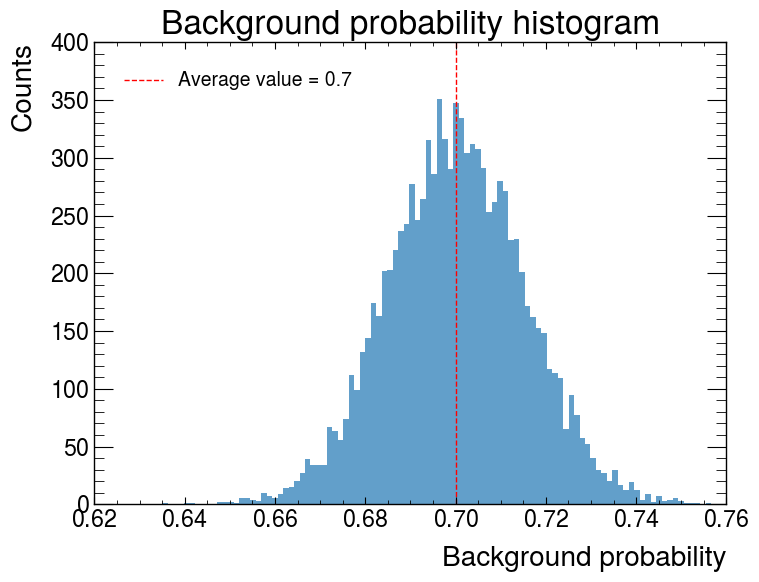

In [80]:
bkg = np.array(data['BKG PROBABILITY'])
bkg_mean = bkg.mean()

N = len(bkg)

plt.hist(bkg, bins=Nbins, alpha=0.7)
plt.axvline(bkg_mean, color='red', linestyle='dashed', linewidth=1, label="Average value = " + str(round(bkg_mean, 3)))
plt.xlabel("Background probability")
plt.ylabel("Counts")
plt.title("Background probability histogram")
plt.legend()
# plt.show()
plt.savefig("bkg_sig.pdf")

In [81]:
data.keys()

Index(['BKG PROBABILITY', 'BKG ERROR', 'SIGNAL PROBABILITY', 'SIGNAL ERROR',
       'CORR', 'MAN_CORR'],
      dtype='object')

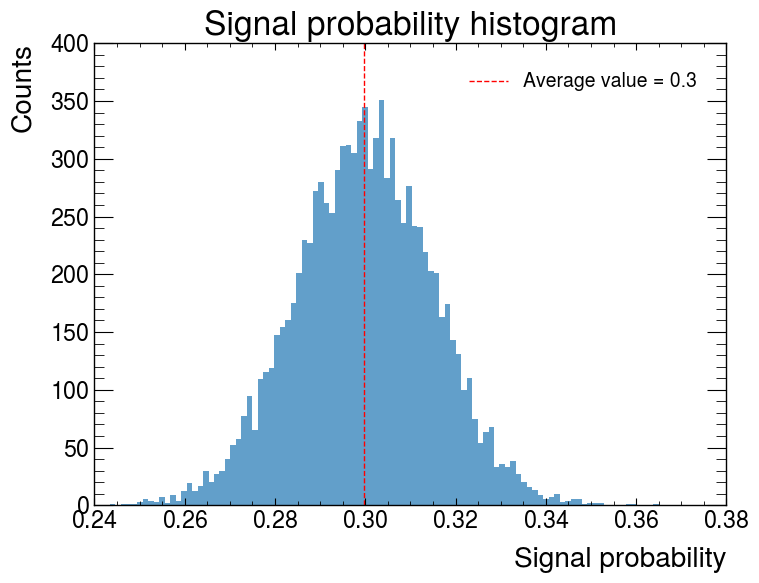

In [82]:
sig = np.array(data['SIGNAL PROBABILITY'])
sig_mean = sig.mean()

plt.axvline(sig_mean, color='red', linestyle='dashed', linewidth=1, label="Average value = " + str(round(sig_mean, 3)))
plt.hist(sig, bins=Nbins, alpha=0.7)
plt.xlabel("Signal probability")
plt.ylabel("Counts")
plt.title("Signal probability histogram")
plt.legend()
# plt.show()
plt.savefig("sig_hist.pdf")

## Correlation matrix between signal and background

<Axes: >

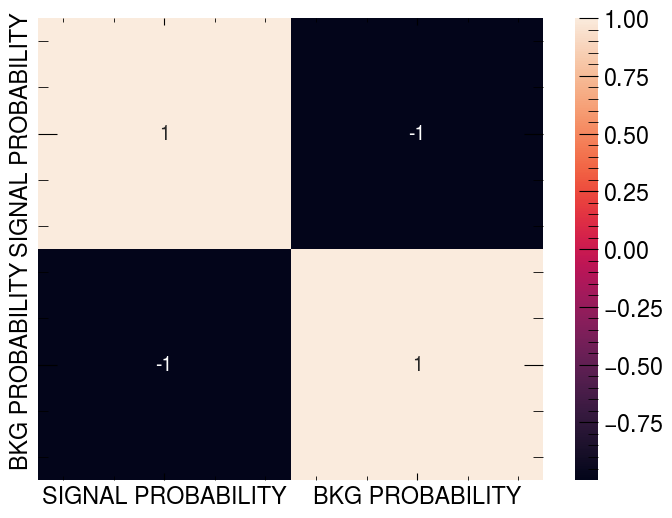

In [83]:
only_prob = data[['SIGNAL PROBABILITY', 'BKG PROBABILITY']]
sns.heatmap(only_prob.corr(), annot=True)

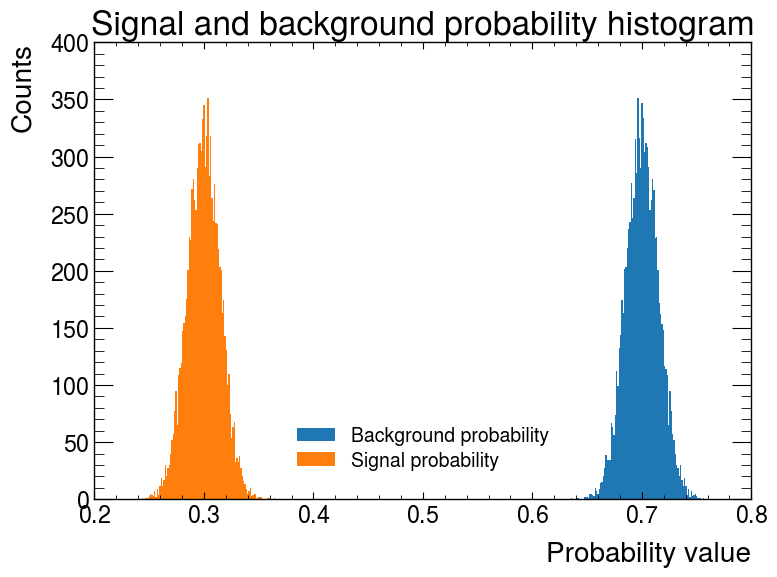

In [84]:
plt.hist(bkg, bins=Nbins, label="Background probability")
plt.hist(sig, bins=Nbins, label="Signal probability")
plt.xlabel("Probability value")
plt.ylabel("Counts")
plt.title("Signal and background probability histogram")
plt.legend()
plt.tight_layout()

## Root mean squared error RMS

In [85]:
rms_sig = np.sqrt(np.sum(sig**2)/N)
rms_bkg = np.sqrt(np.sum(bkg**2)/N)
print(rms_sig, rms_bkg)

0.3001793674755893 0.7003522669423615


## Average error

In [86]:
bkg_std = bkg.std()
sig_std = sig.std()

bkg_av_error = bkg_std / np.sqrt(N)
sig_av_error = sig_std / np.sqrt(N)

print(str(bkg_av_error), "Average bkg error")
print(str(sig_av_error), "Average sig error")

0.0001516454617575157 Average bkg error
0.00015163622043489437 Average sig error


## Manual correlation coefficient

![Alt text](image-1.png)

In [87]:
n_pairs = len(bkg)
new_bkg_mean = np.mean(bkg)
new_sig_mean = np.mean(sig)

new_bkg_std = np.std(bkg)
new_sig_std = np.std(sig)

std_multi = new_bkg_std*new_sig_std
mean_diff_multi = (bkg - new_bkg_mean)*(sig - new_sig_mean)

r = 1/(n_pairs - 1) * np.sum(mean_diff_multi/std_multi)
r

-1.0000996499366228

This is wrong

In [88]:
# def man_correlation(x, y, x_av, y_av):
#     nominator = np.sum((x-x_av) * (y-y_av))
#     denominator = np.sqrt(np.sum((x-x_av)**2)) * np.sqrt(np.sum((y-y_av)**2))
    
#     result = nominator/denominator
#     return result

# total_corr = man_correlation(sig, bkg, sig_mean, bkg_mean)
# print("Total correlation coefficient: ", total_corr)

### Correlation coefficient, point by point

In [89]:
# corr_coefficients = []
# for i in range(N):
#     res = man_correlation(sig[i], bkg[i], sig_mean, bkg_mean)
#     corr_coefficients.append(res)
# corr_coefficients = np.array(corr_coefficients)
# plt.hist(corr_coefficients, bins=50)
# plt.title("Correlation coefficient point by point")
# plt.xlabel("correlation coeff")
# plt.ylabel("Counts")

# plt.savefig("corr_point_by_point.pdf")

### Correlation read from data

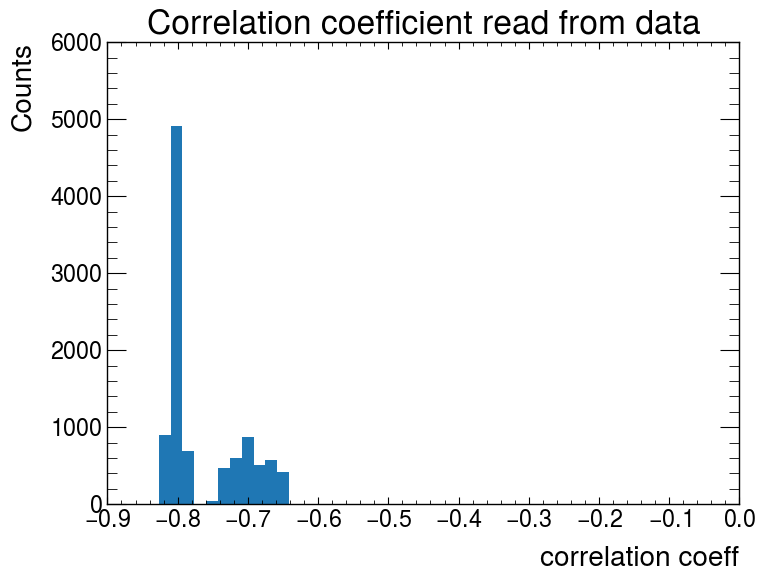

In [90]:
corr_data = np.array(data['CORR'])
plt.hist(corr_data, bins=50)
plt.xlabel("correlation coeff")
plt.ylabel("Counts")
plt.title("Correlation coefficient read from data")
plt.savefig("corr_point_by_point_dat.pdf")

### Correlation filtration


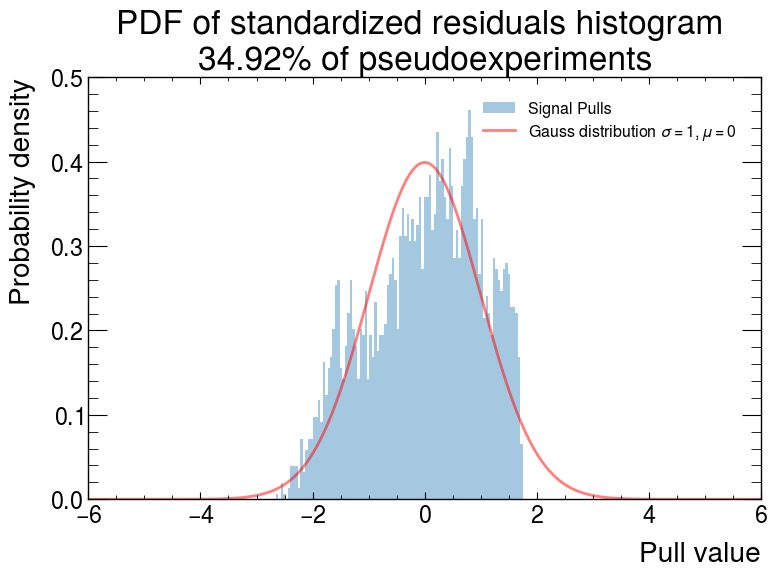

In [91]:
bump_corr_cond = corr_data > -0.75
corr_data_f = corr_data[bump_corr_cond]
# plt.hist(corr_data_f, bins=100)

# Calculate pulls (standardized residuals)
bkg_pulls_f = stats.zscore(bkg[bump_corr_cond])
sig_pulls_f = stats.zscore(sig[bump_corr_cond])

percent_of_pseudoexperiments = round(len(sig_pulls_f)/len(sig)*100, 4)

# Plot histograms of pulls
plt.hist(sig_pulls_f, bins=Nbins, alpha=0.4, label='Signal Pulls', density=True)
plt.xlim([-6, 6])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 1, \mu = 0$', linestyle='-', color='red', alpha=0.5,)
plt.xlabel("Pull value")
plt.ylabel("Probability density")
plt.title('PDF of standardized residuals histogram \n' + str(percent_of_pseudoexperiments) + "% of pseudoexperiments")
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()

plt.savefig(str(filename_cut) + '_sig_pull_cut.pdf')
# plt.hist(bkg_pulls_f, bins=Nbins, alpha=0.6, label='Background Pulls', density=True)

In [109]:
k_sig = sig[bump_corr_cond]

full_sig_std = sig.std()
full_sig_mu =  sig.mean()

bump_sig_std = k_sig.std()
bump_sig_mu =  k_sig.mean()

print(k_sig.std(), k_sig.mean())
print(sig.std(), sig.mean())

L = [filename + ";", str(full_sig_std) + ";", str(full_sig_mu) + ";", str(bump_sig_std) + ";", str(bump_sig_mu) + "; \n"]
 
# Writing to file
with open("myfile.txt", "a") as file1:
    # Writing data to a file
    file1.write(filename + '\n')
    # file1.write("FULL STD; FULL MU; BUMP STD; BUMP MU \n")
    file1.writelines(L)

0.012221528939864354 0.29343405670103095
0.015163622043489438 0.2997961261


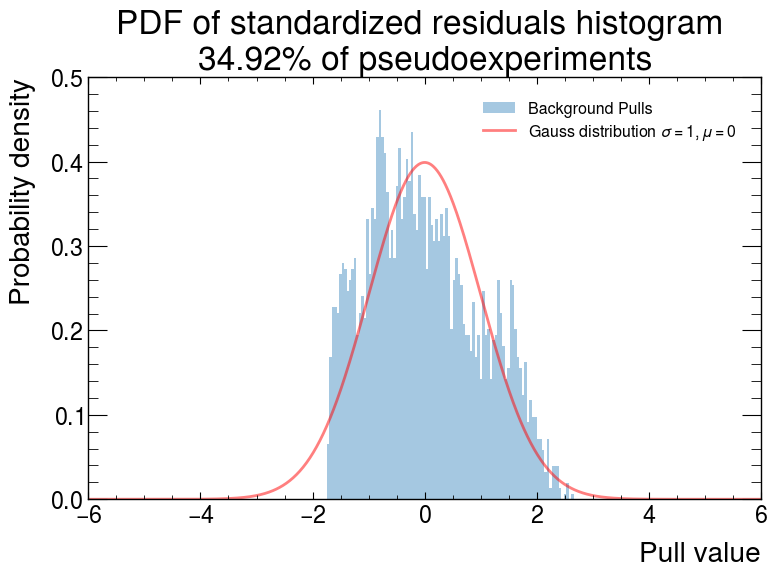

In [93]:
# Plot histograms of pulls
plt.hist(bkg_pulls_f, bins=Nbins, alpha=0.4, label='Background Pulls', density=True)
plt.xlim([-6, 6])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 1, \mu = 0$', linestyle='-', color='red', alpha=0.5,)
plt.xlabel("Pull value")
plt.ylabel("Probability density")
plt.title('PDF of standardized residuals histogram \n' + str(percent_of_pseudoexperiments) + "% of pseudoexperiments")
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()

plt.savefig(str(filename_cut) + '_bkg_pull_cut.pdf')

(array([ 27., 134., 287., 298., 350., 493., 563., 580., 416., 344.]),
 array([0.260942 , 0.2663256, 0.2717092, 0.2770928, 0.2824764, 0.28786  ,
        0.2932436, 0.2986272, 0.3040108, 0.3093944, 0.314778 ]),
 <BarContainer object of 10 artists>)

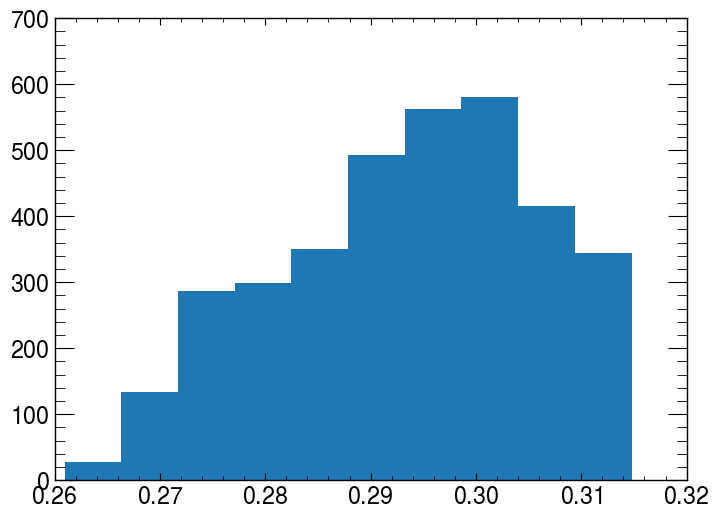

In [94]:
plt.hist(sig[bump_corr_cond])

## Residues and pulls

In [95]:
sig_err = data['SIGNAL ERROR']
bkg_err = data['BKG ERROR']

# from scipy.stats import norm

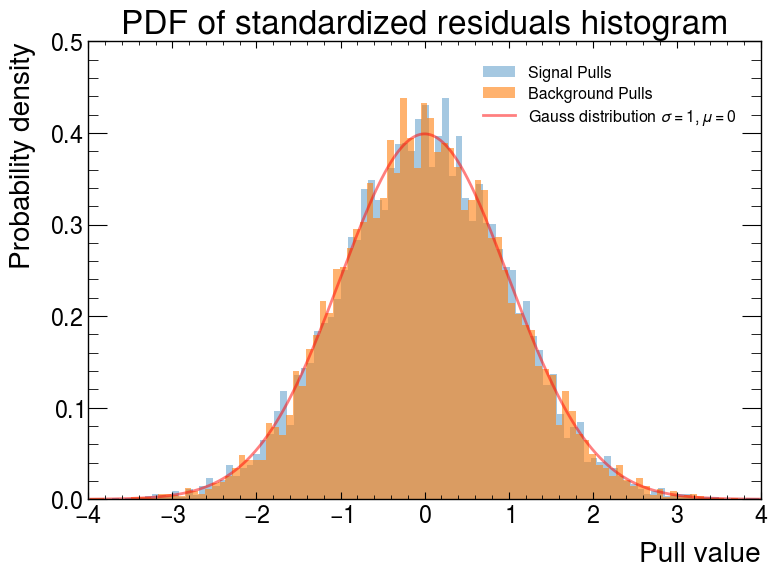

In [96]:
# import numpy as np
# import matplotlib.pyplot as plt

# Assuming sig, bkg, sig_pred, and bkg_pred are defined
sig_pred = 0.3
bkg_pred = 0.7

# Calculate residuals
sig_residues = sig - sig_pred
bkg_residues = bkg - bkg_pred

# Calculate pulls (standardized residuals)
bkg_pulls = stats.zscore(bkg)
sig_pulls = stats.zscore(sig)

weights = np.ones_like(sig_pulls) / len(sig_pulls)

# Plot histograms of pulls
plt.hist(sig_pulls, bins=Nbins, alpha=0.4, label='Signal Pulls', density=True)
plt.hist(bkg_pulls, bins=Nbins, alpha=0.6, label='Background Pulls', density=True)

plt.xlim([-4, 4])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 1, \mu = 0$', linestyle='-', color='red', alpha=0.5,)
plt.xlabel("Pull value")
plt.ylabel("Probability density")
plt.title('PDF of standardized residuals histogram')
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
# Show legen
# plt.show()
plt.savefig("stand_resid_hist.pdf")


#### Different way standardised residues

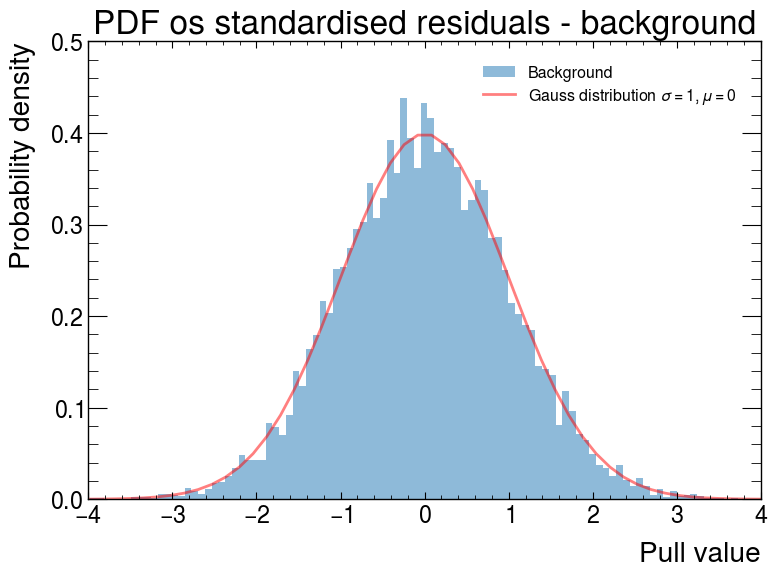

In [97]:
from scipy import stats

f= stats.zscore(bkg)
weights = np.ones_like(sig_pulls) / len(bkg)
plt.hist(f, bins=Nbins, density=True, alpha=0.5, label='Background')
plt.xlim([-4, 4])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 1, \mu = 0$', linestyle='-', color='red', alpha=0.5,)
plt.title("PDF os standardised residuals - background")
plt.xlabel("Pull value")
plt.ylabel("Probability density")
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
plt.savefig("bkg_pull.pdf")

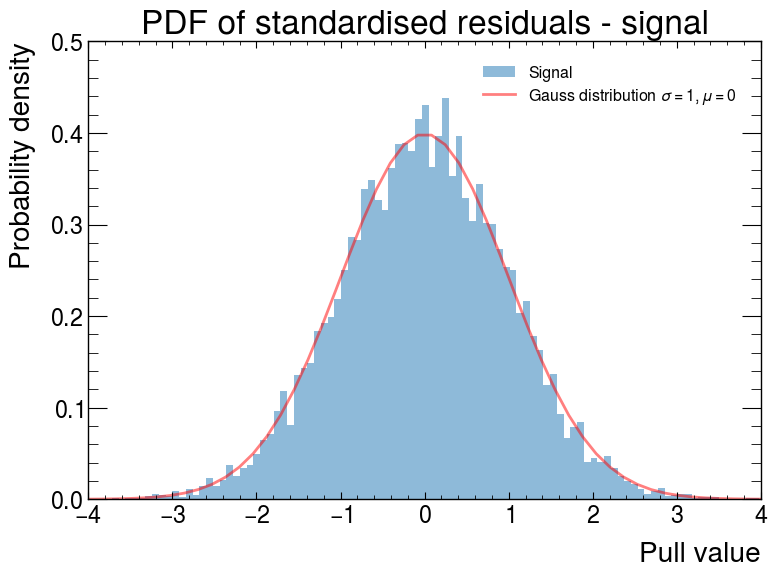

In [98]:
sig_zscore = stats.zscore(sig)
weights = np.ones_like(sig) / len(sig)
plt.hist(sig_zscore, bins=Nbins, density=True, alpha=0.5, label='Signal')
plt.xlim([-4, 4])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 1, \mu = 0$', linestyle='-', color='red', alpha=0.5,)
plt.title("PDF of standardised residuals - signal")
plt.xlabel("Pull value")
plt.ylabel("Probability density")
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
plt.savefig("sig_pull.pdf")

In [99]:
# plt.figure(figsize=(12, 6))  # Adjust the size as needed

# plt.subplot(1, 2, 1)
# plt.hist(bkg_residues, bins=Nbins, alpha=0.5, label='Background residuals')
# plt.ylabel("Counts")
# plt.xlabel("Value")
# plt.ticklabel_format(axis='x', style='plain')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.hist(sig_residues, bins=Nbins, alpha=0.5, color='green', label='Signal residuals')
# plt.ylabel("Counts")
# plt.xlabel("Value")
# plt.ticklabel_format(axis='x', style='plain')
# plt.legend()

# plt.suptitle("Residuals histograms")
# plt.tight_layout()

# plt.savefig("residuals.pdf")


## Standardised residuals other way

In [100]:
# # Assuming sig, bkg, sig_pred, and bkg_pred are defined
# sig_pred = 0.3
# bkg_pred = 0.7

# # Calculate residuals
# sig_residues = sig - sig_pred
# bkg_residues = bkg - bkg_pred

# # Calculate pulls (standardized residuals)
# sig_pulls = sig_residues / sig_err
# bkg_pulls = sig_residues / bkg_err

# weights = np.ones_like(sig_pulls) / len(sig_pulls)

# # plt.hist(sig_pulls, bins=50, alpha=0.4, label='Signal Pulls', weights=weights)
# # plt.hist(bkg_pulls, bins=50, alpha=0.6, label='Background Pulls', weights=weights)

# plt.hist(sig_pulls, bins=50, alpha=0.4, label='Signal Pulls', density=True, stacked=True)
# plt.hist(bkg_pulls, bins=50, alpha=0.6, label='Background Pulls', density=True, stacked=True)

# plt.xlim([-3, 3])
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 50)
# gauss = norm.pdf(x, 0, 1)
# plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 1, \mu = 0$', linestyle='-', color='red', alpha=0.5,)

# plt.xlabel("Pull value")
# plt.ylabel("Probability")
# plt.title('Standardized residuals histogram')
# plt.legend(fontsize="11.5", loc ="upper right")
# plt.tight_layout()
# # Show legen
# # plt.show()

# plt.savefig('pulls.pdf')


## Scatter plot bkg sig

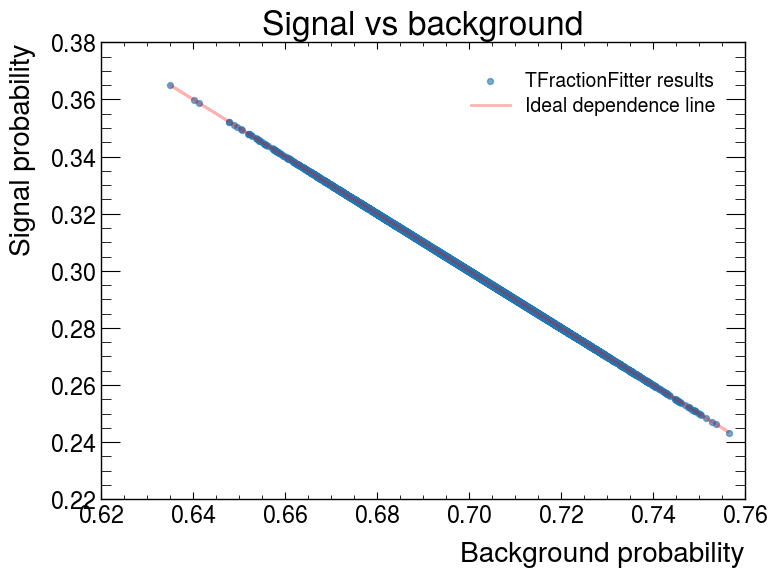

In [101]:
plt.scatter(bkg, sig, s=18, alpha=0.6, label='TFractionFitter results')
plt.xlabel("Background probability")
plt.ylabel("Signal probability")
plt.title("Signal vs background")
teo_sig = 1 - bkg
plt.plot(bkg, teo_sig, c='r', alpha=0.3, label='Ideal dependence line')
plt.legend()
plt.tight_layout()

plt.savefig("sig_vs_bkg.pdf")


### Residuals linear regression

In [102]:
columns_names = ['bkg', 'sig']
con = pd.DataFrame(data=np.column_stack((bkg, sig)), columns=columns_names)
Y = con['sig']
X = con['bkg']

X = sm.add_constant(X)
X.head()

,const,bkg
0,1.0,0.700556
1,1.0,0.675629
2,1.0,0.684992
3,1.0,0.717392
4,1.0,0.686775


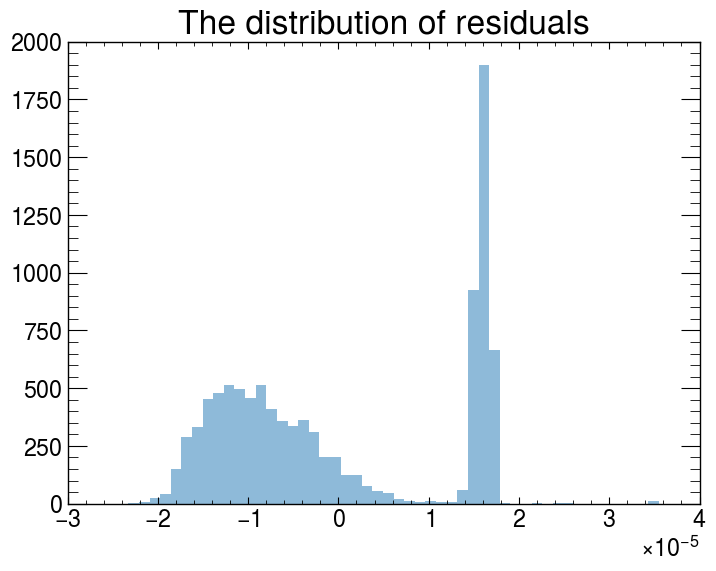

In [103]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

plt.hist(model_result.resid, bins=50, alpha=0.5)
plt.ticklabel_format(axis='y', style='plain')
plt.title("The distribution of residuals")

mu, std = stats.norm.fit(model_result.resid)

In [104]:
# Y_max = Y.max()
# Y_min = Y.min()

# ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
# ax.set(ylim=(Y_min, Y_max))
# ax.set(xlim=(Y_min, Y_max))
# ax.set_xlabel("Predicted value of signal")
# ax.set_ylabel("Observed value of signal")

# X_ref = Y_ref = np.linspace(Y_min, Y_max, Nbins)
# plt.plot(X_ref, Y_ref, color='red', linewidth=1)
# plt.show()

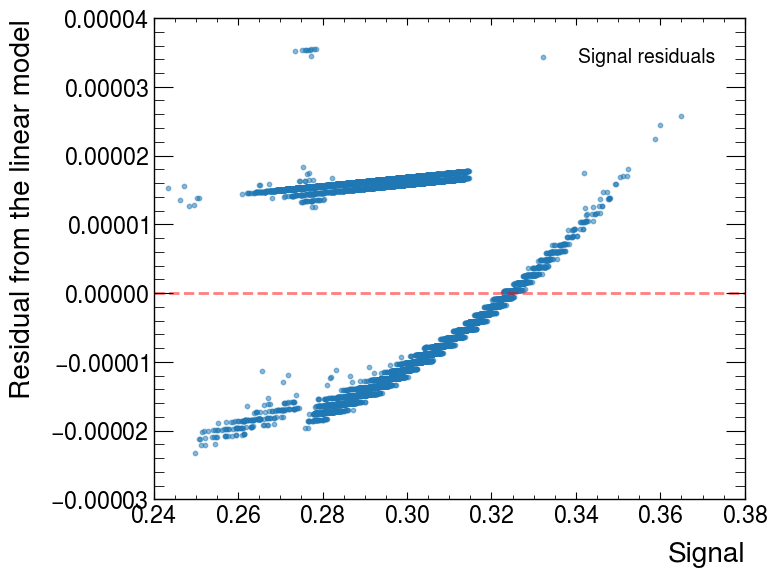

In [105]:
import statsmodels.api as sm

bkg_lr = sm.add_constant(bkg)
reg = sm.OLS(sig, bkg_lr).fit()

bkg_predict = reg.predict(bkg_lr)
bkg_residuals = reg.resid

plt.scatter(bkg_predict, bkg_residuals, alpha=0.5, s=10, label="Signal residuals")
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Signal")
plt.ylabel("Residual from the linear model")
plt.legend()
plt.tight_layout()
plt.savefig("sign_residuals.pdf")